In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip

# STEAM_GAMES

In [3]:
steam = pd.read_csv('../Datasets/cleaned/steam_games_cleaned.csv.gz', compression='gzip')
user_items = pd.read_csv('../Datasets/cleaned/user_items_cleaned.csv.gz', compression='gzip')
user_reviews = pd.read_csv('../Datasets/cleaned/user_review_cleaned.csv.gz', compression='gzip')

In [ ]:
steam_origin = pd.read_json ('../Datasets/origins/steam_games.json.gz', compression='gzip', lines=True)

In [ ]:
steam.describe()

,id,year
count,2.998600e+04,29986.000000
mean,4.511243e+05,2014.773494
std,1.840151e+05,3.420288
min,1.000000e+01,1970.000000
25%,3.266550e+05,2014.000000
50%,4.538150e+05,2016.000000
75%,5.933675e+05,2017.000000
max,2.028850e+06,2021.000000


In [ ]:
user_items.describe()

,items_count,steam_id,item_id,playtime_forever,playtime_2weeks
count,5.170015e+06,5.170015e+06,5.153209e+06,5.153209e+06,5.153209e+06
mean,3.136999e+02,7.656120e+16,1.784481e+05,9.914951e+02,9.104707e+00
std,6.924635e+02,3.918190e+07,1.318598e+05,5.418204e+03,1.403926e+02
min,0.000000e+00,7.656120e+16,1.000000e+01,0.000000e+00,0.000000e+00
25%,7.100000e+01,7.656120e+16,3.446000e+04,0.000000e+00,0.000000e+00
50%,1.370000e+02,7.656120e+16,2.144200e+05,3.400000e+01,0.000000e+00
75%,2.750000e+02,7.656120e+16,2.664300e+05,3.550000e+02,0.000000e+00
max,7.762000e+03,7.656120e+16,5.307200e+05,6.427730e+05,1.996700e+04


In [ ]:
user_reviews.describe()

,item_id,recommend,year_posted,sentiment_analysis
count,48498.000000,48498.000000,48498.000000,48498.000000
mean,155294.235515,0.898120,2014.148150,1.319993
std,124542.998755,0.302494,0.842611,0.694700
min,10.000000,0.000000,2010.000000,0.000000
25%,6550.000000,1.000000,2014.000000,1.000000
50%,209080.000000,1.000000,2014.000000,1.000000
75%,247910.000000,1.000000,2015.000000,2.000000
max,428880.000000,1.000000,2015.000000,2.000000


In [ ]:
steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29986 entries, 0 to 29985
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres    29986 non-null  object
 1   app_name  29986 non-null  object
 2   id        29986 non-null  int64 
 3   year      29986 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 937.2+ KB


In [ ]:
user_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5170015 entries, 0 to 5170014
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   items_count       int64  
 2   steam_id          int64  
 3   user_url          object 
 4   item_id           float64
 5   item_name         object 
 6   playtime_forever  float64
 7   playtime_2weeks   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 315.6+ MB


In [ ]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48498 entries, 0 to 48497
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             48498 non-null  object
 1   item_id             48498 non-null  int64 
 2   recommend           48498 non-null  int64 
 3   review              48471 non-null  object
 4   year_posted         48498 non-null  int64 
 5   sentiment_analysis  48498 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.2+ MB


- CHEQUEO DUPLICADOS

In [ ]:
steam.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
29981    False
29982    False
29983    False
29984    False
29985    False
Length: 29986, dtype: bool

In [ ]:
user_items.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
5170010    False
5170011    False
5170012    False
5170013    False
5170014    False
Length: 5170015, dtype: bool

In [ ]:
user_reviews.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48493    False
48494    False
48495    False
48496    False
48497    False
Length: 48498, dtype: bool

- SENTIMENTS_ANALYSIS (VALORES)

In [ ]:
user_reviews['sentiment_analysis'].value_counts()

sentiment_analysis
2    21945
1    20127
0     6426
Name: count, dtype: int64

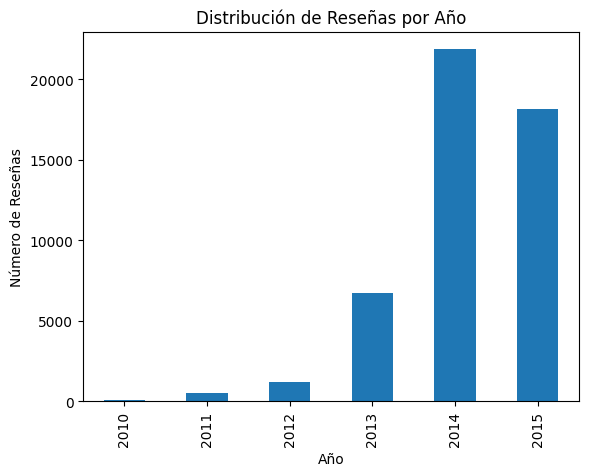

In [ ]:
#Análisis de Reseñas por Año:

user_reviews['year_posted'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('Número de Reseñas')
plt.title('Distribución de Reseñas por Año')
plt.show()

<Axes: xlabel='item_id'>

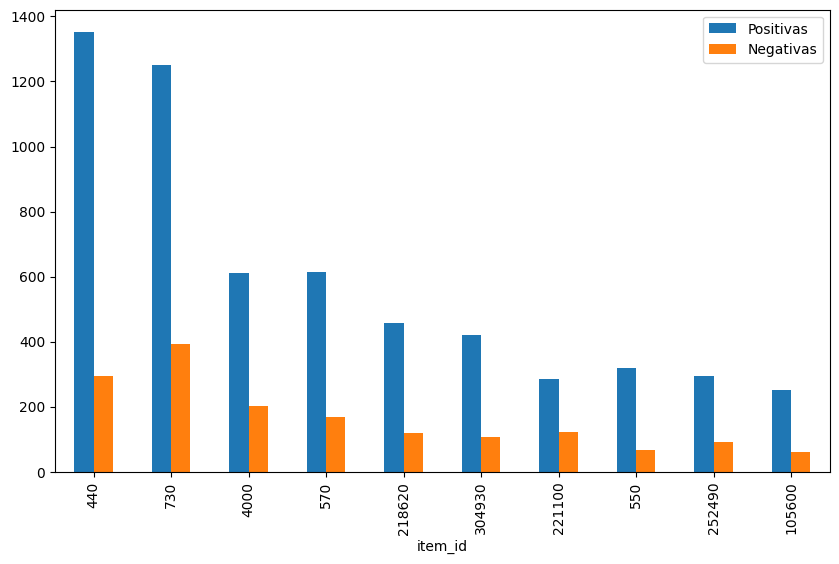

In [ ]:
# Filtrar solo reseñas positivas y negativas
positive_reviews = user_reviews[user_reviews['sentiment_analysis'] == 1]
negative_reviews = user_reviews[user_reviews['sentiment_analysis'] == 0]

# Contar el número de reseñas por cada categoría
positive_counts = positive_reviews['item_id'].value_counts()
negative_counts = negative_reviews['item_id'].value_counts()

# Fusionar los recuentos en un nuevo DataFrame
review_counts = pd.DataFrame({'Positivas': positive_counts, 'Negativas': negative_counts}).fillna(0)
N = 10  # Puedes ajustar este valor según tus necesidades
top_elements = review_counts.sum(axis=1).nlargest(N).index
filtered_review_counts = review_counts.loc[top_elements]

# Graficar
filtered_review_counts.plot(kind='bar', figsize=(10, 6))

In [ ]:
negative_reviews = user_reviews[user_reviews['sentiment_analysis'] == 0]
negative_counts = negative_reviews['item_id'].value_counts()
max_negative_element = negative_counts.idxmax()
max_negative_reviews = negative_counts.max()

print(f"Elemento con más reseñas negativas: {max_negative_element}")
print(f"Número de reseñas negativas: {max_negative_reviews}")

Elemento con más reseñas negativas: 730
Número de reseñas negativas: 393


- PRICE<br>
Esta columna no la incluí en el df cleaned final, pero me parecio importante junto a early_acces a la hora de graficar y hacer anañisis

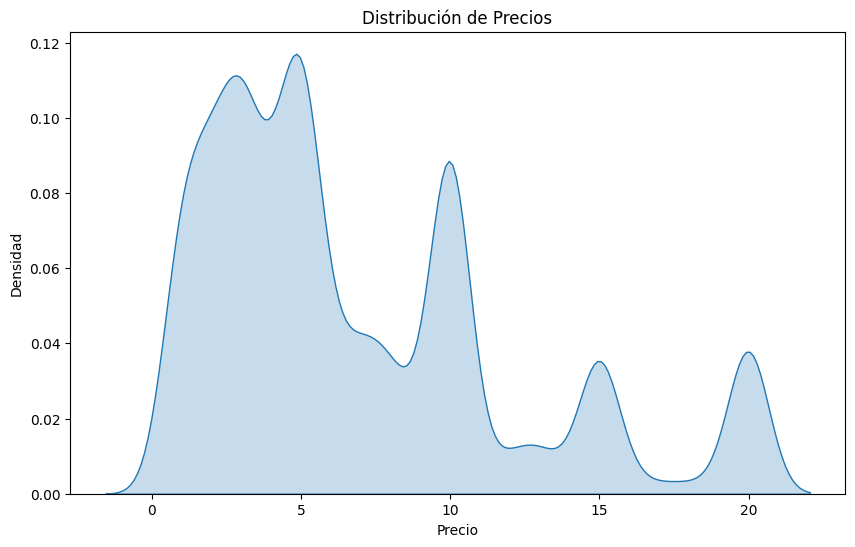

In [24]:
# Gráfico de densidad para visualizar la distribución de 'price'
plt.figure(figsize=(10, 6))
sns.kdeplot(steam_origin['price'], fill=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.show()


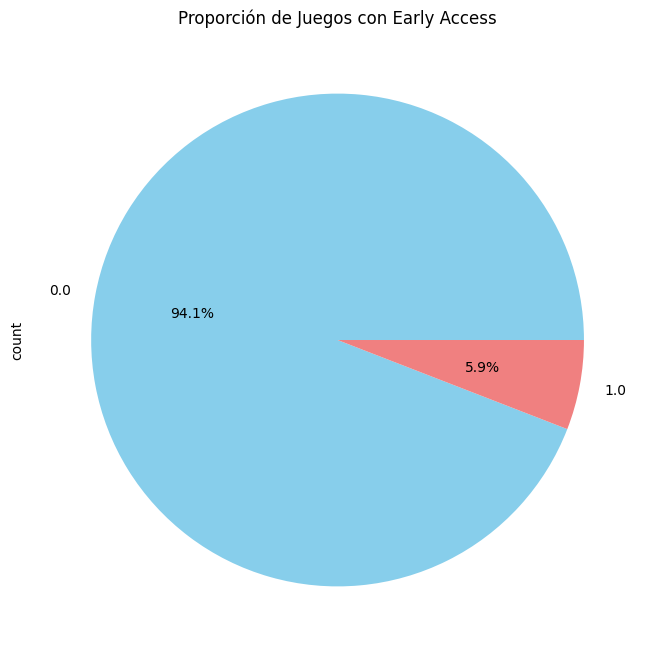

In [29]:
# Gráfico de pastel para visualizar la proporción de juegos con y sin early access
plt.figure(figsize=(8, 8))
steam_origin['early_access'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Proporción de Juegos con Early Access')
plt.show()


- GENERO

In [46]:
genres_top = steam['genres'].str.split(', ').explode().value_counts().head(10)

In [47]:
genres_top

genres
'Indie'           9901
'Adventure'       5753
'Action'          5620
['Action'         5073
'Casual'          4935
['Strategy'       3771
'Singleplayer'    3723
'RPG'             3699
['Indie'          3560
'Indie']          3087
Name: count, dtype: int64

C:\Users\maria\AppData\Local\Temp\ipykernel_2180\556714541.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_top.values, y=genres_top.index, palette='viridis')


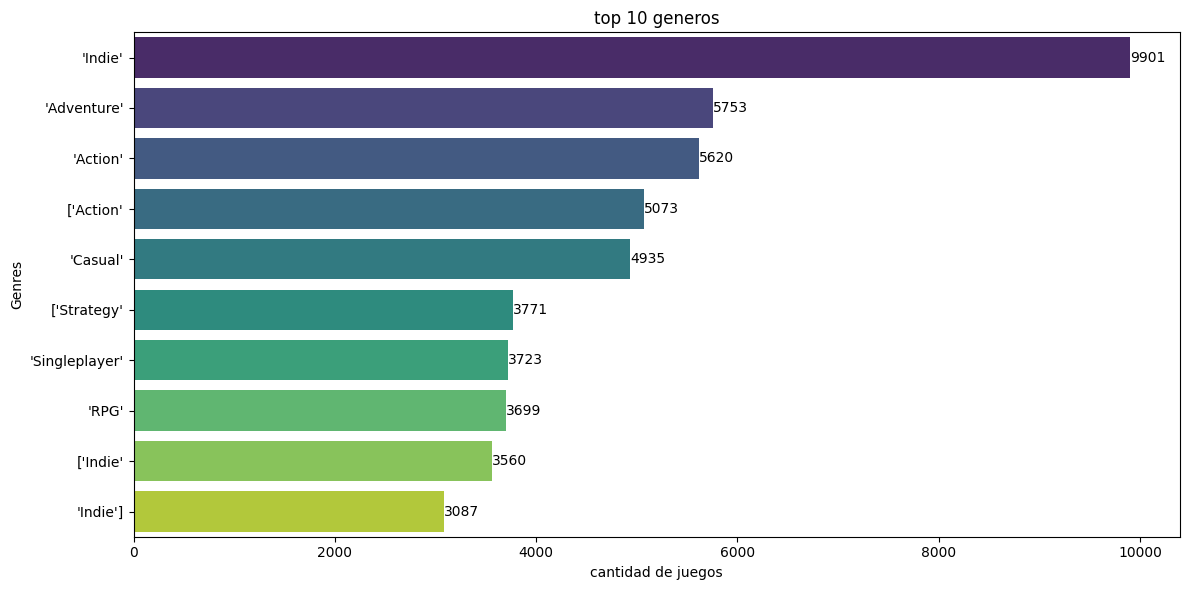

In [50]:
plt.figure(figsize=(12,6))
sns.barplot(x=genres_top.values, y=genres_top.index, palette='viridis')
for barra in plt.gca().patches:
    plt.text(barra.get_x() + barra.get_width(), barra.get_y() + barra.get_height()/2,
             f'{int(barra.get_width())}',
             ha= 'left', va='center')
    
plt.title ('top 10 generos')
plt.xlabel ('cantidad de juegos')
plt.ylabel ('Genres')
plt.tight_layout()
plt.show()